# Création du model de machine learning


#### Étude des variations journalière des données historiques entre le prix le plus haut et le prix le plus bas pour chaque jour afin de mesurer la volatilité du marché dans le but de prédire le prix à la fermeture de chaque bougie.


- utilisation des méthodes de classification de l'apprentissage supervisé

- calcule de la variation entre le prix le plus haut et le plus bas pour chaque période de temps (chaque bougie dans notre cas)

- utilisation de la variable 'close' comme valeur cible(étiquette) dans les données d'apprentissage supervisé


#### Définition des valeurs explicatives (caractéristiques)


- Prix d'ouverture (open)

- Prix le plus haut (high)

- Prix le plus bas (low)

- Prix auquel la paire de trading a été échangée à la fin de cette bougie (close )

- Volume de transactions (volume)


#### Définition de la valeur cible (étiquette)


La valeur cible sera la variable 'close' indiquant le prix de fermeture


#### Prépocessing


In [79]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [80]:
# MongoClient pour interagir avec MongoDB
from pymongo import MongoClient

# authentification à MongoDB
# définition des informations d'identification nécessaires
# pour s'authentifier auprès de MongoDB en local
mongo_user = "admin"
mongo_password = "pass"
mongo_host = "localhost"
mongo_port = 27017


# connexion à la base de données MongoDB
client = MongoClient(
    f"mongodb://{mongo_user}:{mongo_password}@{mongo_host}:{mongo_port}/"
)

# sélection de la base de données
db = client["extract_data_binance"]

# sélection de la collection
collection = db["historical_data"]

In [81]:
# récupération des données de la collection
# et stockage dans un DataFrame
df = pd.DataFrame(list(collection.find()))

# affichage de la taille du dataframe
df.shape

(9033, 8)

In [82]:
# affichage des 5 premières lignes
df.head()

,_id,symbol,timestamp,open,high,low,close,volume
0,65fe8fd7ba05a552d62598a5,BTCUSDT,2020-03-24 10:00:00,6766.62,6806.41,6624.05,6731.00,13280.444536
1,65fe8fd7ba05a552d62598a6,BTCUSDT,2020-03-24 12:00:00,6733.16,6765.00,6543.00,6690.53,17014.878531
2,65fe8fd7ba05a552d62598a7,BTCUSDT,2020-03-24 14:00:00,6690.53,6728.15,6461.01,6587.52,16364.585652
3,65fe8fd7ba05a552d62598a8,BTCUSDT,2020-03-24 16:00:00,6587.63,6706.98,6510.01,6659.11,10638.369409
4,65fe8fd7ba05a552d62598a9,BTCUSDT,2020-03-24 18:00:00,6657.74,6739.17,6552.19,6697.39,10236.182790


In [83]:
# vérification des doublons
doublons = df.duplicated().sum()
print(f"le dataframe contient {doublons} doublons")

le dataframe contient 0 doublons


In [84]:
# vérification des valeurs manquantes
display(df.isna().sum())

_id          0
symbol       0
timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

In [85]:
# vérification des types de données
df.dtypes

_id                  object
symbol               object
timestamp    datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume              float64
dtype: object

In [86]:
# description des statistiques quantitatives
df.describe()

,timestamp,open,high,low,close,volume
count,9033,9033.000000,9033.000000,9033.000000,9033.000000,9033.000000
mean,2020-10-20 05:12:43.201594368,22236.752391,22427.815846,22022.996280,22241.614819,6249.600976
min,2020-03-24 10:00:00,5880.500000,5944.120000,5857.760000,5881.420000,5.887034
25%,2020-05-14 06:00:00,9090.590000,9134.240000,9044.940000,9091.590000,3395.923830
50%,2020-09-09 10:00:00,11279.980000,11346.000000,11200.000000,11288.290000,4934.580989
75%,2021-03-16 18:00:00,36592.480000,37070.000000,36052.040000,36596.620000,7370.636271
max,2021-09-21 06:00:00,64509.480000,64854.000000,63915.000000,64511.210000,75186.338442
std,NaN,17541.393723,17708.016006,17350.517715,17541.392528,4793.154418


In [87]:
# calcul du nombre de modalité(valeurs différentes)pour chaque variable explicative
modalite_par_variable = df.nunique()

# affichage des modalités
print(modalite_par_variable)

_id          9033
symbol          1
timestamp    6543
open         6519
high         6208
low          6258
close        6518
volume       6543
dtype: int64


#### Calcul du taux de variation journalier entre le prix le plus haut et le prix le plus bas pour chaque jour afin de mesurer la volatilité du marché

- la volatilité du marché est une mesure statistique de la dispersion des rendements pour un titre ou un marché donné.

- plus la volatilité est élevée, plus le titre est risqué.


In [88]:
# calcul du taux de variation journalier entre le prix le plus haut et le prix le plus bas
df["taux_variation"] = (df["high"] - df["low"]) / df["low"] * 100


# affichage des 5 premières lignes
df.head()

,_id,symbol,timestamp,open,high,low,close,volume,taux_variation
0,65fe8fd7ba05a552d62598a5,BTCUSDT,2020-03-24 10:00:00,6766.62,6806.41,6624.05,6731.00,13280.444536,2.752999
1,65fe8fd7ba05a552d62598a6,BTCUSDT,2020-03-24 12:00:00,6733.16,6765.00,6543.00,6690.53,17014.878531,3.392939
2,65fe8fd7ba05a552d62598a7,BTCUSDT,2020-03-24 14:00:00,6690.53,6728.15,6461.01,6587.52,16364.585652,4.134648
3,65fe8fd7ba05a552d62598a8,BTCUSDT,2020-03-24 16:00:00,6587.63,6706.98,6510.01,6659.11,10638.369409,3.025648
4,65fe8fd7ba05a552d62598a9,BTCUSDT,2020-03-24 18:00:00,6657.74,6739.17,6552.19,6697.39,10236.182790,2.853702


In [89]:
# vérification des valeurs manquantes
display(df.isna().sum())

_id               0
symbol            0
timestamp         0
open              0
high              0
low               0
close             0
volume            0
taux_variation    0
dtype: int64

In [90]:
# suppression des colonnes non nécessaire au machine learning
# "timestamp" car nous avons effectué le calcul de la variation journalière
# "_id" car c'est un identifiant unique
# "symbol" car nous avons un seul symbole
df = df.drop(["timestamp", "_id", "symbol"], axis=1)

# affichage pour vérification
df.head()

,open,high,low,close,volume,taux_variation
0,6766.62,6806.41,6624.05,6731.00,13280.444536,2.752999
1,6733.16,6765.00,6543.00,6690.53,17014.878531,3.392939
2,6690.53,6728.15,6461.01,6587.52,16364.585652,4.134648
3,6587.63,6706.98,6510.01,6659.11,10638.369409,3.025648
4,6657.74,6739.17,6552.19,6697.39,10236.182790,2.853702


In [91]:
# #  séparation de la variable cible des variables explicatives

feats = df.drop("close", axis=1)
target = df["close"]

# affichage pour vérification
feats.head()
target.head()

0    6731.00
1    6690.53
2    6587.52
3    6659.11
4    6697.39
Name: close, dtype: float64

In [92]:
# importation de la fonction train_test_split
# pour séparer le jeu de données en données d'entraînement et données de test
from sklearn.model_selection import train_test_split

# séparation du jeu d'entrainement et du jeu de test
X_train, X_test, y_train, y_test = train_test_split(
    feats, target, test_size=0.20, random_state=42
)

# vérification des tailles du jeu de données
print("train Set:", X_train.shape)
print("test Set:", X_test.shape)

train Set: (7226, 5)
test Set: (1807, 5)


In [93]:
# vérification du type des variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9033 entries, 0 to 9032
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            9033 non-null   float64
 1   high            9033 non-null   float64
 2   low             9033 non-null   float64
 3   close           9033 non-null   float64
 4   volume          9033 non-null   float64
 5   taux_variation  9033 non-null   float64
dtypes: float64(6)
memory usage: 423.5 KB


In [94]:
df.head()

,open,high,low,close,volume,taux_variation
0,6766.62,6806.41,6624.05,6731.00,13280.444536,2.752999
1,6733.16,6765.00,6543.00,6690.53,17014.878531,3.392939
2,6690.53,6728.15,6461.01,6587.52,16364.585652,4.134648
3,6587.63,6706.98,6510.01,6659.11,10638.369409,3.025648
4,6657.74,6739.17,6552.19,6697.39,10236.182790,2.853702


In [95]:
# il n'y a pas de variables catégorielles donc pas besoin de faire de séparation entre les variables numériques et catégorielles

In [96]:
# affichage vérifications des valeurs manquantes
# dans les jeux de données d'entraînement et de test
# des variables explicatives
print("valeurs manquantes dans X_train:")
print(X_train.isna().sum())

print("valeurs manquantes dans X_test:")
print(X_test.isna().sum())

# affichage vérifications des valeurs manquantes
# dans les jeux de données d'entraînement
# et de test de la cible
print("valeurs manquantes dans y_train:")
print(y_train.isna().sum())

print("valeurs manquantes dans y_test:")
print(y_test.isna().sum())

valeurs manquantes dans X_train:
open              0
high              0
low               0
volume            0
taux_variation    0
dtype: int64
valeurs manquantes dans X_test:
open              0
high              0
low               0
volume            0
taux_variation    0
dtype: int64
valeurs manquantes dans y_train:
0
valeurs manquantes dans y_test:
0


In [97]:
# remplissage des valeurs manquantes dans la variable cible
from sklearn.impute import SimpleImputer

# création de l'imputeur pour les variables manquantes numériques avec la stratégie "median"
num_imputer = SimpleImputer(missing_values=np.nan, strategy="median")

# application de l'imputeur sur X_train et X_test
X_train_imputed = pd.DataFrame(
    num_imputer.fit_transform(X_train), columns=X_train.columns
)

X_test_imputed = pd.DataFrame(num_imputer.transform(X_test), columns=X_test.columns)

# affichage vérifications des valeurs manquantes numériques
print("valeurs manquantes numériques dans X_train:")
print(X_train_imputed.isna().sum())

print("valeurs manquantes numériques dans X_test:")
print(X_test_imputed.isna().sum())

valeurs manquantes numériques dans X_train:
open              0
high              0
low               0
volume            0
taux_variation    0
dtype: int64
valeurs manquantes numériques dans X_test:
open              0
high              0
low               0
volume            0
taux_variation    0
dtype: int64


In [98]:
# il n'y a pas d'encodage à faire car il n'y a pas de variables catégorielles

In [99]:
# assignation des variables nettoyées
X_train_clean = X_train_imputed
X_test_clean = X_test_imputed

In [100]:
# importation de la classe LinearRegression
from sklearn.linear_model import LinearRegression

# initialisation du modèle de régression linéaire
regressor = LinearRegression()

# entrainement du modèle de régression linéaire
regressor.fit(X_train_clean, y_train)

LinearRegression()

In [101]:
# évaluation de la performance du modèle

# définition de la fonction de calcul du coefficient de détermination R2
coeffs = list(regressor.coef_)
# ajout du coefficient de l'ordonnée à l'origine
coeffs.insert(0, regressor.intercept_)

# création d'un dataframe pour afficher les coefficients
feats2 = list(feats.columns)
# ajout de l'ordonnée à l'origine
feats2.insert(0, "intercept")

# création d'un dataframe pour afficher les coefficients
pd.DataFrame({"valeur estimée": coeffs}, index=feats2)

,valeur estimée
intercept,12.394046
open,-0.465765
high,0.876605
low,0.587200
volume,-0.002562
taux_variation,7.654279


In [102]:
# affichage du coefficient de détermination R2 sur le jeu d'entraînement
print(
    "Coefficient de détermination du modèle sur train:",
    regressor.score(X_train_clean, y_train),
)

# affichage du coefficient de détermination R2 sur le jeu de test
print(
    "Coefficient de détermination du modèle sur test:",
    regressor.score(X_test_clean, y_test),
)

Coefficient de détermination du modèle sur train: 0.9999166354553182
Coefficient de détermination du modèle sur test: 0.9999170921313414


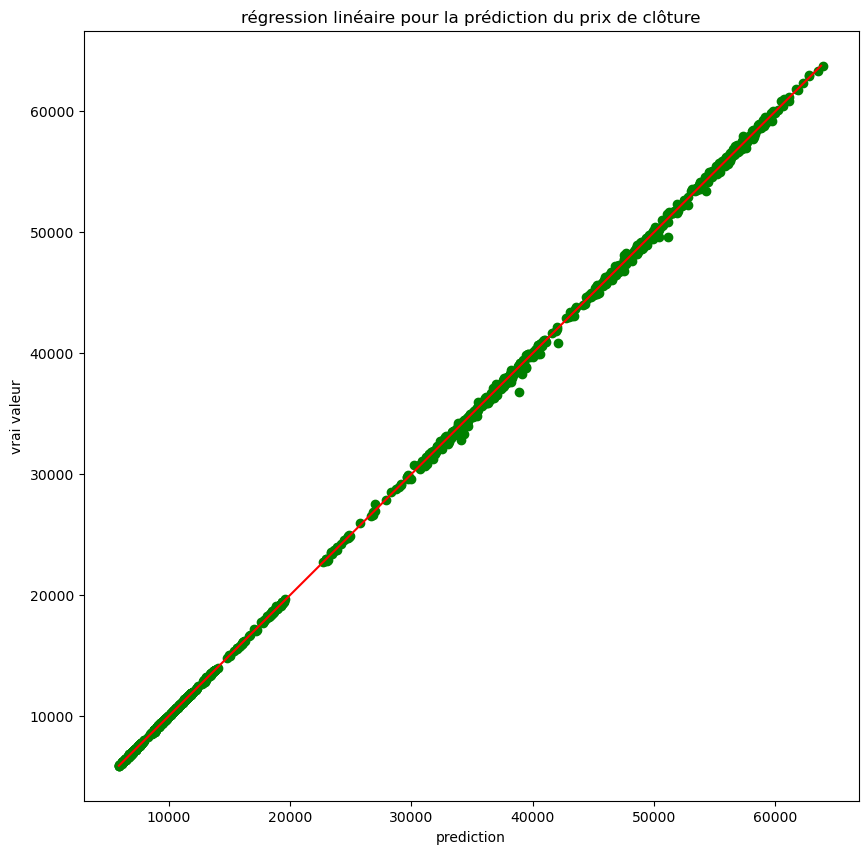

In [103]:
# importation de matplotlib pour la visualisation
import matplotlib.pyplot as plt
%matplotlib inline

# création d'une figure pour afficher le nuage de points
fig = plt.figure(figsize=(10, 10))

# instanciation de l'objet LinearRegression, apprentissage et prédiction
pred_test = regressor.predict(X_test_clean)

# création d'un nuage de points pour afficher les prédictions
plt.scatter(pred_test, y_test, c="green")

# affichage de la droite d'équation y = x par dessus le nuage de points
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color="red")

# ajout de titre et de labels
plt.xlabel("prediction")
plt.ylabel("vrai valeur")
plt.title("régression linéaire pour la prédiction du prix de clôture")

# affichage du graphique
plt.show()

Prédictions :


In [104]:
# définition d'une pipeline pour le prétraitement des données ou pas ?
from sklearn.pipeline import Pipeline